# Analyzing personal productivity

Clockify web-app allows you to export your work history, so here I'm playing with this data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [13]:
filename = '../../data/clockify_report.csv'

df = pd.read_csv(filename)

df['start'] = pd.to_datetime(df['Start Time'])
df['end']   = pd.to_datetime(df['End Time'])
df['day']   = pd.to_datetime(df['Start Date'])

print('Rows:', df.shape[0])
print('First date in the dataset:', df.loc[df.shape[0]-1,'day'])
df.columns

Rows: 966
First date in the dataset: 2021-01-29 00:00:00


Index(['Project', 'Client', 'Description', 'Task', 'User', 'Email', 'Tags',
       'Billable', 'Start Date', 'Start Time', 'End Date', 'End Time',
       'Duration (h)', 'Duration (decimal)', 'Billable Rate (USD)',
       'Billable Amount (USD)', 'start', 'end', 'day'],
      dtype='object')

In [7]:
print(df.loc[0,'Start Time'])
print(df.start.dt.hour[0])

22:11
22


In [16]:
hist = np.zeros(24*60)

for row in range(df.shape[0]):
    start = df.start.dt.hour[row]*60 + df.start.dt.minute[row]
    end = df.end.dt.hour[row]*60 + df.end.dt.minute[row]
    hist[start:end] += 1
    
day_first = min(df.day.dt.dayofyear)
day_last  = max(df.day.dt.dayofyear)
print(day_first, day_last)
hist /= (day_last - day_first)

29 78


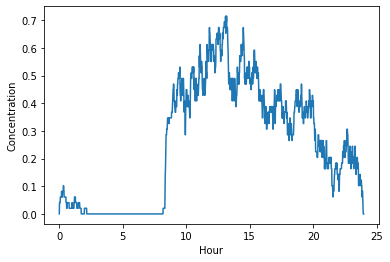

In [17]:
x = np.arange(0, 24, 1/60)
plt.plot(x, hist);
plt.xlabel('Hour');
plt.ylabel('Concentration');